In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error


dataset = pd.read_csv('ProcessedObesityDataSet_Regression.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)

x = dataset.drop(['Weight'], axis=1)
y = dataset.Weight.values

print(x, y)

      Gender   Age  Height  family_history_with_overweight  FAVC  FCVC  NCP  \
0          1  21.0    1.62                               1     0   2.0  3.0   
1          1  21.0    1.52                               1     0   3.0  3.0   
2          0  23.0    1.80                               1     0   2.0  3.0   
3          0  27.0    1.80                               0     0   3.0  3.0   
4          0  22.0    1.78                               0     0   2.0  1.0   
...      ...   ...     ...                             ...   ...   ...  ...   
2106       1  21.0    1.71                               1     1   3.0  3.0   
2107       1  22.0    1.75                               1     1   3.0  3.0   
2108       1  23.0    1.75                               1     1   3.0  3.0   
2109       1  24.0    1.74                               1     1   3.0  3.0   
2110       1  24.0    1.74                               1     1   3.0  3.0   

      CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRAN

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [86]:
i=1
sols = np.zeros([31, 5])

In [87]:
while i <=30:
    sols[i][0] = i
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(x_train, y_train)

    y_train_pred = regr.predict(x_train)
    y_test_pred = regr.predict(x_test)

    sols[i][1] = r2_score(y_train, y_train_pred)
    sols[i][2] = r2_score(y_test, y_test_pred)

    # print(f'The training accuracy for the model is {r2_train}')
    # print(f'The testing accuracy for the model is {r2_test}')

    sols[i][3] = (mean_squared_error(y_train, y_train_pred))**(1/2)
    sols[i][4] = (mean_squared_error(y_test, y_test_pred))**(1/2)

    # print(f'The training RMSE for the model is {rmse_train}')
    # print(f'The testing RMSE for the model is {rmse_test}')

    i += 1

sols = sols[1:]
print(sols)

[[ 1.          0.64231619  0.59864661 15.64409265 16.65255403]
 [ 2.          0.82428432  0.82951296 10.9649333  10.85333153]
 [ 3.          0.92935127  0.93278676  6.95269096  6.8146697 ]
 [ 4.          0.96661557  0.96641905  4.77939309  4.81685823]
 [ 5.          0.9816688   0.97857342  3.5415728   3.84763495]
 [ 6.          0.98850031  0.98212606  2.80507081  3.51420845]
 [ 7.          0.99180577  0.98450755  2.36785405  3.27173012]
 [ 8.          0.99386346  0.98528572  2.04909629  3.18850316]
 [ 9.          0.99534237  0.9855068   1.78518543  3.16445967]
 [10.          0.9963163   0.98529492  1.58760571  3.18750681]
 [11.          0.99695065  0.98517039  1.44445593  3.2009745 ]
 [12.          0.99727144  0.98521685  1.36636782  3.19595652]
 [13.          0.99747417  0.98495606  1.31462829  3.2240238 ]
 [14.          0.9976066   0.98507853  1.27970195  3.21087337]
 [15.          0.99764759  0.98498853  1.26869613  3.22054228]
 [16.          0.99765452  0.98504488  1.26682538  3.21

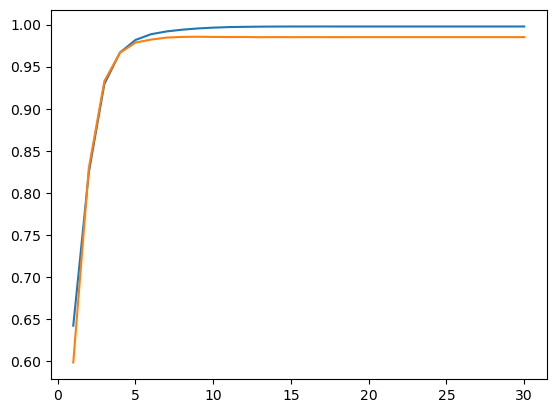

In [88]:
plt.figure(1)
plt.plot(sols[:, 0], sols[:, 1])
plt.plot(sols[:, 0], sols[:,2])

plt.show()

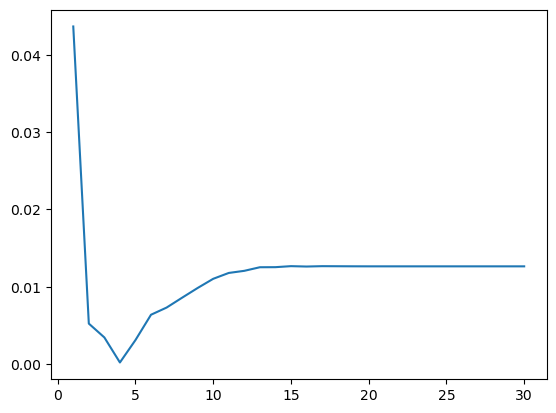

In [89]:
plt.figure(2)
plt.plot(sols[:, 0], abs(sols[:,2]- sols[:, 1] ))
plt.show()